In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def generate_stock_price_paths(S, r, sigma, T, N):
    """
    Generate Monte Carlo simulations of stock prices.
    """
    dt = T / N
    eps = np.random.normal(0, 1, size=(N, ))
    paths = S * np.exp(np.cumsum((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * eps))
    return paths

def generate_option_price_paths(S, r, sigma, T, N, options):
    """
    Generate Monte Carlo simulations of option prices.
    """
    dt = T / N
    S_paths = np.zeros((N, ))
    S_paths[0] = S
    option_paths = np.zeros((N, len(options)))
    for i in range(1, N):
        S_paths[i] = S_paths[i-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * np.random.normal())
        for j, option in enumerate(options):
            payoff = max(0, (S_paths[i] - option['strike']) if option['type'] == 'call' else (option['strike'] - S_paths[i]))
            option_paths[i, j] = option['quantity'] * np.exp(-r * dt * i) * payoff
    return option_paths

def calculate_portfolio_value(S, r, sigma, T, N, options):
    """
    Calculate the value of the options portfolio.
    """
    S_paths = generate_stock_price_paths(S, r, sigma, T, N)
    option_paths = generate_option_price_paths(S, r, sigma, T, N, options)
    portfolio_value = np.sum(option_paths, axis=1)
    return portfolio_value, S_paths

def calculate_risk_standard_deviation(portfolio_value):
    """
    Calculate risk as standard deviation.
    """
    sigma = np.std(portfolio_value)
    return sigma

def calculate_value_at_risk(portfolio_value, level=0.05):
    """
    Calculate value-at-risk.
    """
    VaR = np.percentile(portfolio_value, 100*level)
    return VaR

def calculate_conditional_value_at_risk(portfolio_value, VaR):
    """
    Calculate conditional value-at-risk.
    """
    CVaR = np.mean(portfolio_value[portfolio_value <= VaR])
    return CVaR

def calculate_credit_at_risk(portfolio_value):
    """
    Calculate credit at risk.
    """
    EL = np.mean(portfolio_value[portfolio_value < 0])
    VaR = calculate_value_at_risk(portfolio_value)
    CaR = VaR - EL
    return CaR

# Example usage
S = 100
r = 0.05
sigma = 0.2
T = 1
N = 100000
options = [{'quantity': 10, 'strike': 110, 'type': 'call'},
           {'quantity': 5, 'strike': 90, 'type': 'put'},
           {'quantity': 20, 'strike': 100, 'type': 'call'}]

portfolio_value, S_paths = calculate_portfolio_value(S, r, sigma, T, N, options)
sigma = calculate_risk_standard_deviation(portfolio_value)
VaR = calculate_value_at_risk(portfolio_value)
CVaR = calculate_conditional_value_at_risk(portfolio_value, VaR)
CaR = calculate_credit_at_risk(portfolio_value)

C:\Users\deves\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\deves\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


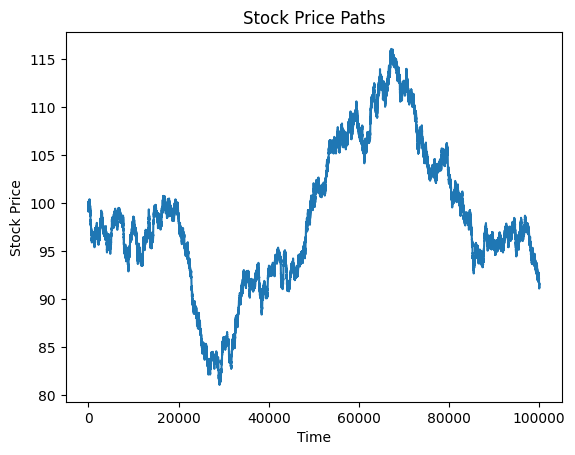

In [2]:
#Plot stock price paths
plt.plot(S_paths)
plt.title('Stock Price Paths')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.show()

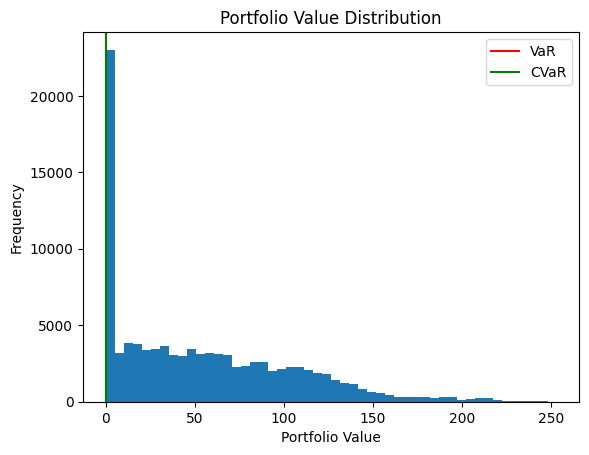

In [3]:
#Plot portfolio value distribution
plt.hist(portfolio_value, bins=50)
plt.axvline(VaR, color='r', label='VaR')
plt.axvline(CVaR, color='g', label='CVaR')
plt.title('Portfolio Value Distribution')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [4]:
#Print results
print(f'Risk (Standard Deviation): {sigma:.2f}')
print(f'Value-at-Risk: {VaR:.2f}')
print(f'Conditional Value-at-Risk: {CVaR:.2f}')
print(f'Credit at Risk: {CaR:.2f}')

Risk (Standard Deviation): 50.53
Value-at-Risk: 0.00
Conditional Value-at-Risk: 0.00
Credit at Risk: nan
